# Oppgaver for hånd

**Oppgave 1 - Repetisjon**
Løs følgende system for hånd ved hjelp av Gauss-eliminasjon uten pivotering:

$$
\begin{cases}
2x + y - z = 8 \\
-3x - y + 2z = -11 \\
-2x + y + 2z = -3
\end{cases}
$$

**Oppgave 2: Forover- og bakoverfeil**
Vi ønsker å skille mellom foroverfeil og bakoverfeil.

Gitt systemet

$$A = \begin{bmatrix} 2 & 1 \\ 1 & 3 \end{bmatrix}, \quad
b = \begin{bmatrix} 3 \\ 5 \end{bmatrix}, \quad
\tilde{x} = \begin{bmatrix} 1.0 \\ 1.3 \end{bmatrix}.$$

Hvor $\tilde{x}$ er en tilnærmet løsning.

1. Finn den eksakte løsningen x.
2. Finn foroverfeilen $||x - \tilde{x}||$.
3. Finn bakoverfeilen ved å beregne $\tilde{b} = A \tilde{x}$ og sammenligne med b.



# Oppgaver med koding

**Oppgave 3 - Øve på å løse matriser** 

Under har jeg implementert noen funksjoner for å løse et likningsstem $Ax=b$ med hjelp av Gauss-eliminasjon. 

Med hjelp av denne metoden løs følgende problemer:

a) Oppgave 1 og oppgave 2

b) En 3x3 matrise med tilfeldige koeffisienter (np.random.rand(3,3)) og en tilfeldig 3x1 vektor b (np.random.rand(3,1))


In [20]:
import numpy as np

def gauss_forover(A, b):
    # Lager 0 nedenfor diagonalen til matrisen A
    # Returnerer den øvre triangulære systemet A og den oppdatere vektoren b

    (m,n) = np.shape(A)
    
    # Vi går kolonne for kolonne
    for i in range(m-1):  # diagonal
        diagonal = A[i, i]
        
        for j in range(i+1, m):  # radene under diagonalen
            coeff = A[j, i] / diagonal
            
            # Oppdater alle tallene i raden
            for k in range(i, n):  
                A[j, k] = A[j, k] - coeff * A[i, k]
            
            # Oppdater høyresidevektoren
            b[j] = b[j] - coeff * b[i]

    return A, b


def gauss_bakover(A, b):
    # Utfører bakover substitusjon på et øvre triangulært system.
    # Returnerer løsningen x

    (m, n) = np.shape(A)
    x = np.zeros(n)
    
    # Starter fra nederste rad og går oppover
    for i in range(m-1, -1, -1):
        # Summen av A[i,j] * x[j] for j > i
        sum_ax = 0
        for j in range(i+1, n):
            sum_ax += A[i, j] * x[j]
        
        x[i] = (b[i] - sum_ax) / A[i, i]
    
    return x

def gauss_elimansjon(A, b):
    # Gitt en matrise A og vektor b, finn løsningen x til systemet Ax=b
    # Returnerer løsningen x

    # Pass på at elementene ikke blir lagret som heltall
    A = A.astype(float)
    b = b.astype(float)

    A, b = gauss_forover(A, b)
    x = gauss_bakover(A, b)

    return x


# Oppgave a
Aa1 = np.array([[2,1,-1],[-3,-1,2], [-2,1,2]])
ba1 = np.array([8,-11,-3])

xa1 = gauss_elimansjon(Aa1,ba1)

Aa2 = np.array([[2,1], [1,3]])
ba2 = np.array([3,5])

xa2 = gauss_elimansjon(Aa2,ba2)

print(f"Løsningen på første problem er x = {xa1}")
print(f"Løsningen på andre  problem er x = {xa2}")


# Oppgave b
Ab = np.random.rand(3,3)
bb = np.random.rand(3)

xb = gauss_elimansjon(Ab, bb)

print(f"Løsningen på systemet:\n A = {Ab} \n b = {bb} \n er : x = {xb}")



Løsningen på første problem er x = [ 2.  3. -1.]
Løsningen på andre  problem er x = [0.8 1.4]
Løsningen på systemet:
 A = [[0.19381654 0.16908838 0.36672277]
 [0.74092356 0.86812441 0.73732031]
 [0.69916891 0.07525466 0.71219298]] 
 b = [0.34460561 0.5233214  0.47206694] 
 er : x = [-0.56693233  0.0560433   1.21347852]



**Oppgave 4: Swamping**
Løs systemet

$$
\begin{cases}
10^{-20}x + 2y = 1 \\
x + 2y = 4
\end{cases}
$$

a) Hva er den eksakte løsningen? 

b) Hvis du bruker metoden for Gauss-eliminasjon fra oppgave 3, hva blir den tilnærmete løsningen? Hva har skjedd? 


c ) Hvis vi istedetfor løser likningssystemet:

$$
\begin{cases}
x + 2y = 4 \\
10^{-20}x + 2y = 1
\end{cases}
$$

Hvordan ser løsningen ut da? 


In [ ]:
# Den eksakte løsningen er: x = 3*10^20 / (10^20 -1)  og y = (-4 + 10^20)/(-2+2*10^20). 
# Dette er for alle praktiske formål likt: x=3, y=0.5 


#b) 
Aa = np.array([[10**-20, 2],[1,2]])
ba = np.array([1,4])

xa = gauss_elimansjon(Aa, ba)

print(f"Standard gauss-eliminasjon gir svaret: x = {xa}")
print(f"Problemet er at når vi deler på 10^-20 i gauss-eliminajon blir verdier overkjørt grunnet tallstørrelsene er så forskjellig")
print(f"Nøyaktig er problemet at 2-2*10^20 blir lagret som -2*10^20 i minnet siden presisjonen bare er 16 desimaler\n")


#c)
Ab = np.array([[1,2],[10**-20, 2]])
bb = np.array([4,1])

xb = gauss_elimansjon(Ab, bb)

print(f"Ved å bytte rekkefølgen på svarene får vi: x = {xb}")



Standard gauss-eliminasjon gir svaret: x = [0.  0.5]
Problemet er at når vi deler på 10^-20 i gauss-eliminajon blir verdier overkjørt grunnet tallstørrelsene er så forskjellig
Nøyaktig er problemet at 2-2*10^20 blir lagret som -2*10^20 i minnet siden presisjonen bare er 16 desimaler

Ved å bytte rekkefølgen på svarene får vi: x = [3.  0.5]


**Oppgave 5: Gauss-eliminasjon med pivotering**

For å løse problemet med "swamping" som sett i oppgave 4 pleier løsere å bruke "pivot"-ing. Det vil si at dersom vi må dele på et lite tall i metoden vår bytter vi rekkefølgen på likningene. 

Utvid koden for Gauss-eliminasjon slik at den inkluderer partiell pivotering.
Test på systemet fra oppgave 4.

In [36]:
#DENNE FUNKSJONEN ER NY
def gauss_pivot(A, b, i):
    # Finner raden med største absoluttverdi i kolonne i (fra rad i og nedover)
    (m, n) = np.shape(A)
    pivot_row = i + np.argmax(np.abs(A[i:m, i]))  # rad med største pivot

    if pivot_row != i:
        # Bytt om radene i A
        A[[i, pivot_row]] = A[[pivot_row, i]]
        # Bytt om radene i b
        b[[i, pivot_row]] = b[[pivot_row, i]]

    return A, b




def gauss_forover_pivot(A, b):
    # Lager 0 nedenfor diagonalen til matrisen A
    # Returnerer den øvre triangulære systemet A og den oppdatere vektoren b

    (m,n) = np.shape(A)
    
    # Vi går kolonne for kolonne
    for i in range(m-1):  # diagonal

        #DENNE LINJEN ER NY
        #Sjekk for pivot
        A, b = gauss_pivot(A,b,i)

        diagonal = A[i, i]
        
        for j in range(i+1, m):  # radene under diagonalen
            coeff = A[j, i] / diagonal
            
            # Oppdater alle tallene i raden
            for k in range(i, n):  
                A[j, k] = A[j, k] - coeff * A[i, k]
            
            # Oppdater høyresidevektoren
            b[j] = b[j] - coeff * b[i]

    return A, b


def gauss_bakover_pivot(A, b):
    # Utfører bakover substitusjon på et øvre triangulært system.
    # Returnerer løsningen x

    (m, n) = np.shape(A)
    x = np.zeros(n)
    
    # Starter fra nederste rad og går oppover
    for i in range(m-1, -1, -1):
        # Summen av A[i,j] * x[j] for j > i
        sum_ax = 0
        for j in range(i+1, n):
            sum_ax += A[i, j] * x[j]
        
        x[i] = (b[i] - sum_ax) / A[i, i]
    
    return x

def gauss_elimansjon_pivot(A, b):
    # Gitt en matrise A og vektor b, finn løsningen x til systemet Ax=b
    # Returnerer løsningen x

    # Pass på at elementene ikke blir lagret som heltall
    A = A.astype(float)
    b = b.astype(float)

    A, b = gauss_forover_pivot(A, b)
    x = gauss_bakover_pivot(A, b)

    return x


A = np.array([[10**-20, 2],[1,2]])
b = np.array([1,4])

x = gauss_elimansjon_pivot(A, b)

print(f"Med pivot'ing får vi rett svar: x = {x}")



Med pivot'ing får vi rett svar: x = [3.  0.5]


**Oppgave 6 - Tidskompleksitet gauss-eliminasjon** 

Vi skal teste tidskompleksiteten til gauss-eliminasjon. 

Anta at tiden koden tar å finne løsningen til et $NxN$ system er: $t=O(N^a)$ hvor $a$ er en konstant vi vil finne. 

Bruk koden fra oppgave 3 og gjennomfør følgende steg:

a) Definer en rekke forskjellige N-verdier (vær obs på at $N>1000$ kan ta veldig lang tid)

b) For hver N-verdi lag en tilfeldig matrise $A$ og tilfeldig vektor $b$

c) Start tidtaking og kjør metoden fra tidligere. 

d) Stopp tiden, og lagre tiden $t$ og størrelsen på matrisen $N$

e) Når du har tatt tiden for alle N'verdiene, plot verdiene i et logaritmisk diagram (plt.loglog(x,y)) og les av stigningstallet. 

Stigningstallet fra diagrammet vil være konstanten $a$. Hva betyr det for tiden det vil ta å finne løsningen til et system $Ax=b$ hvis man går fra $N=10$ til $N=100$?

In [ ]:
import time
import matplotlib.pyplot as plt

# Tester for de ulike N-verdiene:

N = [2**i for i in range(1,10)]
tider = np.zeros(np.shape(N))

for i, n in enumerate(N):

    A = np.random.rand(n,n)
    b = np.random.rand(n)

    # Start klokken
    t0 = time.time() 

    # Kjør kode 
    x = gauss_elimansjon_pivot(A,b)

    # Stopp klokken
    t1 = time.time()

    tider[i] = t1-t0
    
    print(f"N={n} brukte t={t1-t0}s")


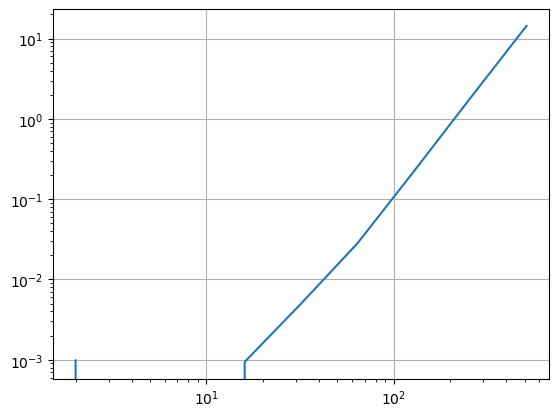

In [ ]:
fig, ax = plt.subplots()

# Her kan vi lese av stigningstallet at stigningstallet er cirka 3. Det betyr at gauss eliminasjon vokser som O(N^3)
# Går vi fra N=10 til N=100 betyr det at vi forventer at tiden det tar forventes å øke med 10^3=1000
ax.loglog(N, tider)
ax.grid('on')

**Oppgave 7 - Jacobi-iterasjon**

a) 

Løs systemet

$$
\begin{cases}
10x - y + 2z = 6 \\
-x + 11y - z = 25 \\
2x - y + 10z = -11
\end{cases}
$$

ved hjelp av Jacobi-iterasjon. Start med $x^{(0)} = (0,0,0)$ og utfør 5 iterasjoner.

(Hint: du kan lagre diagonalen til matrisen A med å bruke np.diag(np.diag(A))  nedre triagulære matrisen med np.tril(A) og øvre triangulære matrisen med np.triu(A) )

(Hint 2: inversen til en diagonal matrise D kan finnes med å ta 1/D )

b)

Prøv Jacobi på systemet:

$$
\begin{cases}
1x + 2y = 1 \\
2x + 1y = 0
\end{cases}
$$

Bruk en passende startverdi.

Hva skjer? Hvorfor får du svaret som du får? 

In [ ]:
import numpy as np

def jacobi(A, b, x0, n_iter):
    # Løser systemet Ax = b med Jacobi-iterasjon.
    
    # Diagonalmatrisen (kun diag)
    D = np.diag(np.diag(A))
    # Resten (L+U)
    R = A - D
    # Inversen av diagonalmatrisen (bare elementvis invers)
    D_inv = np.diag(1 / np.diag(D))

    x = x0.copy()
    print("Iterasjoner (Jacobi):")
    for k in range(n_iter):
        # @ gir matriseganging
        x = D_inv @ (b - R @ x)
        print(f"Iterasjon {k+1}: x = {x}")
    return x


# Oppgave 7a
A1 = np.array([[10, -1, 2],[-1, 11, -1],[2, -1, 10]], dtype=float)

b1 = np.array([6, 25, -11], dtype=float)

x0 = np.array([0, 0, 0], dtype=float)

print("Oppgave 7a:")
x_approx = jacobi(A1, b1, x0, 5)
print(f"Løsning etter 5 iterasjoner: {x_approx}\n")


# Oppgave 7b
A2 = np.array([[1, 2],
               [2, 1]], dtype=float)

b2 = np.array([1, 0], dtype=float)

x0b = np.array([0, 0], dtype=float)

print("Oppgave 7b:")
x_approx_b = jacobi(A2, b2, x0b, 10)
print(f"Løsning etter 10 iterasjoner: {x_approx_b}\n")

print("Kommentar:")
print("Systemet i b) konvergerer ikke med Jacobi. "
      "Årsaken er at A ikke er diagonaldominant, "
      "så iterasjonsmetoden divergerer.")


Oppgave 7a:
Iterasjoner (Jacobi):
Iterasjon 1: x = [ 0.6         2.27272727 -1.1       ]
Iterasjon 2: x = [ 1.04727273  2.22727273 -0.99272727]
Iterasjon 3: x = [ 1.02127273  2.27768595 -1.08672727]
Iterasjon 4: x = [ 1.04511405  2.26677686 -1.07648595]
Iterasjon 5: x = [ 1.04197488  2.26987528 -1.08234512]
Løsning etter 5 iterasjoner: [ 1.04197488  2.26987528 -1.08234512]

Oppgave 7b:
Iterasjoner (Jacobi):
Iterasjon 1: x = [1. 0.]
Iterasjon 2: x = [ 1. -2.]
Iterasjon 3: x = [ 5. -2.]
Iterasjon 4: x = [  5. -10.]
Iterasjon 5: x = [ 21. -10.]
Iterasjon 6: x = [ 21. -42.]
Iterasjon 7: x = [ 85. -42.]
Iterasjon 8: x = [  85. -170.]
Iterasjon 9: x = [ 341. -170.]
Iterasjon 10: x = [ 341. -682.]
Løsning etter 10 iterasjoner: [ 341. -682.]

Kommentar:
Systemet i b) konvergerer ikke med Jacobi. Årsaken er at A ikke er diagonaldominant, så iterasjonsmetoden divergerer.


**Oppgave 8 - Gauss-Seidel**

Løs problemene i oppgave 7 med en implementasjon av Gauss-Seidel istedet. Er det noen forskjell på løsningen etter samme antall iterasjoner? Fungerer Gauss-Seidel der Jacobi fungerer?

In [47]:
import numpy as np

# Gauss-Seidel-iterasjon

def gauss_seidel(A, b, x0, n_iter):
    # Løser systemet Ax = b med Gauss-Seidel-iterasjon.
    x = x0.copy()
    m, n = A.shape

    print("Iterasjoner (Gauss-Seidel):")
    for k in range(n_iter):
        for i in range(m):
            # summen før diagonalen (bruker oppdaterte verdier)
            sum1 = np.dot(A[i, :i], x[:i])
            # summen etter diagonalen (bruker gamle verdier)
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x[i] = (b[i] - sum1 - sum2) / A[i, i]
        print(f"Iterasjon {k+1}: x = {x}")
    return x


# ----------------------------
# Oppgave 8a (samme system som 7a)
# ----------------------------
A1 = np.array([[10, -1, 2],
               [-1, 11, -1],
               [2, -1, 10]], dtype=float)

b1 = np.array([6, 25, -11], dtype=float)

x0 = np.array([0, 0, 0], dtype=float)

print("Oppgave 8a:")
x_approx = gauss_seidel(A1, b1, x0, 5)
print(f"Løsning etter 5 iterasjoner: {x_approx}\n")


# ----------------------------
# Oppgave 8b (samme system som 7b)
# ----------------------------
A2 = np.array([[1, 2],
               [2, 1]], dtype=float)

b2 = np.array([1, 0], dtype=float)

x0b = np.array([0, 0], dtype=float)

print("Oppgave 8b:")
x_approx_b = gauss_seidel(A2, b2, x0b, 10)
print(f"Løsning etter 10 iterasjoner: {x_approx_b}\n")

print("Kommentar:")
print("Gauss-Seidel konvergerer også for systemet i a), og ofte raskere enn Jacobi. "
      "For systemet i b) fungerer det fortsatt ikke, siden matrisen ikke er diagonaldominant. "
      "Begge metodene krever en viss stabilitet i systemet.")


Oppgave 8a:
Iterasjoner (Gauss-Seidel):
Iterasjon 1: x = [ 0.6         2.32727273 -0.98727273]
Iterasjon 2: x = [ 1.03018182  2.2766281  -1.07837355]
Iterasjon 3: x = [ 1.04333752  2.26954218 -1.08171329]
Iterasjon 4: x = [ 1.04329688  2.26923487 -1.08173589]
Iterasjon 5: x = [ 1.04327066  2.26923043 -1.08173109]
Løsning etter 5 iterasjoner: [ 1.04327066  2.26923043 -1.08173109]

Oppgave 8b:
Iterasjoner (Gauss-Seidel):
Iterasjon 1: x = [ 1. -2.]
Iterasjon 2: x = [  5. -10.]
Iterasjon 3: x = [ 21. -42.]
Iterasjon 4: x = [  85. -170.]
Iterasjon 5: x = [ 341. -682.]
Iterasjon 6: x = [ 1365. -2730.]
Iterasjon 7: x = [  5461. -10922.]
Iterasjon 8: x = [ 21845. -43690.]
Iterasjon 9: x = [  87381. -174762.]
Iterasjon 10: x = [ 349525. -699050.]
Løsning etter 10 iterasjoner: [ 349525. -699050.]

Kommentar:
Gauss-Seidel konvergerer også for systemet i a), og ofte raskere enn Jacobi. For systemet i b) fungerer det fortsatt ikke, siden matrisen ikke er diagonaldominant. Begge metodene krever en v

**Oppgave 9 - sammenligning iterative metoder**

Bruk systemet
$$
\begin{cases}
4x + y = 9 \\
x + 3y = 10
\end{cases}
$$

Start med $x^{(0)} = (0,0)$.

1. Implementer Jacobi og Gauss-Seidel.
2. Kjør begge metodene til $\|x^{(k)} - x^{(k-1)}\| < 10^{-6}$.
3. Sammenlign antall iterasjoner.

In [53]:
import numpy as np

# ----------------------------
# Jacobi-iterasjon med stoppkriterium
# ----------------------------
def jacobi_tol(A, b, x0, tol=1e-6, max_iter=10000):
    D = np.diag(np.diag(A))
    R = A - D
    D_inv = np.diag(1 / np.diag(D))

    x = x0.copy()
    for k in range(1, max_iter+1):
        x_new = D_inv @ (b - R @ x)
        if np.linalg.norm(x_new - x) < tol:
            return x_new, k
        x = x_new
    return x, max_iter


# ----------------------------
# Gauss-Seidel-iterasjon med stoppkriterium
# ----------------------------
def gauss_seidel_tol(A, b, x0, tol=1e-6, max_iter=10000):
    x = x0.copy()
    m, n = A.shape

    for k in range(1, max_iter+1):
        x_old = x.copy()
        for i in range(m):
            sum1 = np.dot(A[i, :i], x[:i])      # bruk oppdaterte verdier
            sum2 = np.dot(A[i, i+1:], x_old[i+1:])  # bruk gamle verdier
            x[i] = (b[i] - sum1 - sum2) / A[i, i]
        if np.linalg.norm(x - x_old) < tol:
            return x, k
    return x, max_iter


# ----------------------------
# Oppgave 9
# ----------------------------
A = np.array([[4, 1],
              [1, 3]], dtype=float)

b = np.array([9, 10], dtype=float)

x0 = np.array([0, 0], dtype=float)

tol = 10**(-6)

# Jacobi
x_jacobi, k_jacobi = jacobi_tol(A, b, x0, tol = tol)
print("Jacobi:")
print(f"  Løsning: {x_jacobi}")
print(f"  Iterasjoner: {k_jacobi}\n")

# Gauss-Seidel
x_gs, k_gs = gauss_seidel_tol(A, b, x0, tol = tol)
print("Gauss-Seidel:")
print(f"  Løsning: {x_gs}")
print(f"  Iterasjoner: {k_gs}\n")

print("Kommentar:")
print("Begge metodene konvergerer fordi systemet er diagonaldominant.")
print("Gauss-Seidel konvergerer som regel raskere enn Jacobi, "
      "og vi ser at antall iterasjoner her er mindre for Gauss-Seidel.")


Jacobi:
  Løsning: [1.5454545  2.81818174]
  Iterasjoner: 14

Gauss-Seidel:
  Løsning: [1.54545457 2.81818181]
  Iterasjoner: 8

Kommentar:
Begge metodene konvergerer fordi systemet er diagonaldominant.
Gauss-Seidel konvergerer som regel raskere enn Jacobi, og vi ser at antall iterasjoner her er mindre for Gauss-Seidel.
